In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import re
from datetime import datetime
%matplotlib inline

In [2]:
NOTEBOOK_DIR = os.getcwd()
BASE_DIR = os.path.dirname(NOTEBOOK_DIR)
DATA_DIR = os.path.join(BASE_DIR, "data")
DATA_DIR_PATH = os.path.join(DATA_DIR, "Data_cars.csv")
DATA_ZIP_DIR_PATH = os.path.join(DATA_DIR, "Data_cars.csv.zip")

In [3]:
if not os.path.exists(DATA_DIR_PATH):
    !unzip "${DATA_ZIP_DIR_PATH}"

In [4]:
data_car = pd.read_csv(DATA_DIR_PATH)

In [5]:
data_car.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description
0,11220.0,PEUGEOT,308,2014,94341.0 km,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ..."
1,57526.0,BMW,X6,2015,39051.0 km,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M..."
2,80379.0,AUDI,RS6,2014,75381.0 km,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II..."
3,2830.0,FORD,KA,2007,92282.0 km,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis..."
4,12925.0,FIAT,TIPO,2018,10.0 km,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ..."


In [6]:
data_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166695 entries, 0 to 166694
Data columns (total 9 columns):
Price          166695 non-null float64
Make           166695 non-null object
Model          166695 non-null object
Model_year     166695 non-null int64
Mileage        166695 non-null object
Fuel           166695 non-null object
Gearbox        166695 non-null object
Online         166695 non-null object
Description    166695 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 11.4+ MB


In [12]:
def online_clean(df):
    datetime_format = "%d/%m/%Y à %Hh%M"
    df.Online = [datetime.strptime(d, datetime_format) for d in df.Online.values]
    return df

def mileage_clean(df):
    df.Mileage = [float(m.split(' ')[0]) for m in df.Mileage.values]
    return df

def descriptions_clean(df):
    regex_pattern = r"modele:\s*(?P<modele>.*?(?=,)),\sversion:\s*(?P<version>.*?(?=,)),\spuissance_fiscale:\s*(?P<puissance_fiscale>.*?(?=,)),\sportes:\s*(?P<portes>.*?(?=,)),\soptions:\s*(?P<Descriptions>.*?(?=,)),\scouleur:\s(?P<couleur>.*$)"
    version = []
    spuissance_fiscale = []
    portes = []
    options = []
    couleur = []
    for i in range(df.shape[0]):
        match = re.search(regex_pattern, df.Description[i])
        version.append(match.group(2))
        spuissance_fiscale.append(match.group(3))
        portes.append(match.group(4))
        options.append(match.group(5))
        couleur.append(match.group(6))
    df["version"] = list(map(str.lower, version))
    df["spuissance_fiscale"] = spuissance_fiscale
    df["portes"] = portes
    df["options"] = options
    df["couleur"] = list(map(str.lower, couleur))
    del df["Description"]
    return df

def preprocessing(data, preprocessors=None):
    df = data.copy(deep=True)
    if preprocessors is not None:
        for preprocessor in preprocessors:
            df = preprocessor(df)
        return df
    else:
        return df

In [13]:
data_car_preprocessed = preprocessing(data_car, [online_clean, mileage_clean, descriptions_clean])

In [14]:
data_car_preprocessed.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,version,spuissance_fiscale,portes,options,couleur
0,11220.0,PEUGEOT,308,2014,94341.0,Diesel,mécanique,2018-07-06 03:47:00,1.6 hdi fap 92ch business 5p,4,5.0,banquette arrière 3 places;volant cuir;cache b...,blanc banquise
1,57526.0,BMW,X6,2015,39051.0,Diesel,automatique,2018-04-03 16:41:00,(f16) xdrive30d 258 m sport bva8,16,5.0,triangle de presignalisation et trousse de pre...,carbonschwarz metallise
2,80379.0,AUDI,RS6,2014,75381.0,Essence,automatique,2018-07-30 01:55:00,iii avant 4.0 tfsi 560 quattro tiptronic,47,5.0,banquette arrière 3 places;écran tactile;témoi...,noir panthere cristal
3,2830.0,FORD,KA,2007,92282.0,Essence,mécanique,2018-07-09 14:12:00,1.3 70 fun,5,3.0,direction assistée;jantes alu;rétroviseurs éle...,jaune
4,12925.0,FIAT,TIPO,2018,10.0,Essence,mécanique,2018-05-19 03:52:00,ii sw 1.4 95 pop,5,5.0,Volant alu & cuir;Bluetooth inclut musique en ...,blanc verni


In [15]:
data_car_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166695 entries, 0 to 166694
Data columns (total 13 columns):
Price                 166695 non-null float64
Make                  166695 non-null object
Model                 166695 non-null object
Model_year            166695 non-null int64
Mileage               166695 non-null float64
Fuel                  166695 non-null object
Gearbox               166695 non-null object
Online                166695 non-null datetime64[ns]
version               166695 non-null object
spuissance_fiscale    166695 non-null object
portes                166695 non-null object
options               166695 non-null object
couleur               166695 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 16.5+ MB


In [22]:
data_car_preprocessed.Online.describe()

count                  166695
unique                 123336
top       2018-07-07 17:12:00
freq                        7
first     2018-01-03 02:34:00
last      2018-10-29 10:45:00
Name: Online, dtype: object

## Data Visualization

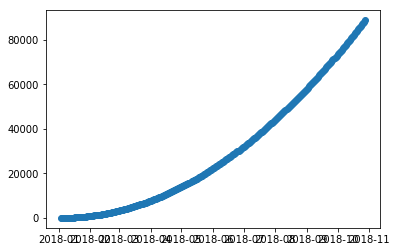

In [23]:
import datetime
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
date_start = datetime.datetime( 2018, 1, 3)
date_end = datetime.datetime( 2018, 10, 29)
delta_date = datetime.timedelta(days=1)
dates = drange(date_start, date_end, delta_date)

ys = np.arange( len(dates) )

fig, ax = plt.subplots()

ax.plot_date(dates, ys*ys)

ax.xaxis.set_major_formatter( DateFormatter('%Y-%m') )

plt.show()

In [28]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *

init_notebook_mode(connected=True)         # initiate notebook for offline plot

trace0 = Scatter(
  x=[1, 2, 3, 4],
  y=[10, 15, 13, 17]
)
trace1 = Scatter(
  x=[1, 2, 3, 4],
  y=[16, 5, 11, 9]
)

data = Data([trace0, trace1])

iplot(data)  

/Users/nguyenkhacbaoanh/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




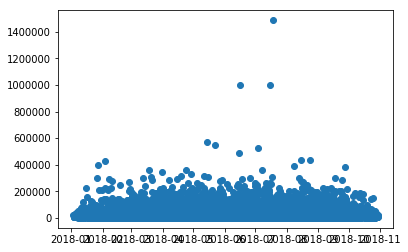

In [24]:
fig, ax = plt.subplots()

ax.plot_date(data_car_preprocessed.Online, data_car_preprocessed.Price)

ax.xaxis.set_major_formatter( DateFormatter('%Y-%m') )

plt.show()

In [ ]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()
ax.plot('date', 'prices', data=data)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years.
datemin = np.datetime64(data['date'][0], 'Y')
datemax = np.datetime64(data['date'][-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()